In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import time

## Part b) QR Decomposition

#### It is optional to do this problem on Jupyter Notebook but we recommend it to get more practice with numpy and matrix manipulation. You can NOT simply use any inbuilt QR decomposition functions if you want credit for this question

In [2]:
### Optional QR Decomposition work goes here


# Higher Dimensional Least Square

At this point of the question, you have already setup and solved a system by hand. We will now recreate the system in code, and use it to solve a system with more (albeit noisy) data.

First, let's recreate the system in part (a).

**Construct the A matrix you came up with from part (a) below**

In [3]:
#TODO: Construct the A matrix you found in part (a)
x_vals = np.array([1, 2, 3, 4])
b = np.array([8, 12, 10, -4])

A = np.array([[1, 1, 1, 1],
             [8, 4, 2, 1],
             [27, 9, 3, 1],
             [48, 16, 4, 1]])
print(A)

[[ 1  1  1  1]
 [ 8  4  2  1]
 [27  9  3  1]
 [48 16  4  1]]


Now that we have our original system setup, **solve for the polynomial coeffecients below**

In [4]:
#TODO: Solve for the coeffecients of the polynomial
#Hint: Remember, our current system is invertible
coef = np.dot(np.linalg.inv(A), b)
print(coef)

[ 0.6 -6.6 19.6 -5.6]


In [5]:
def p(x, coef):
    return sum([coef[i]*np.power(x,3-i) for i in range(0,4)])

#### Original System Plot

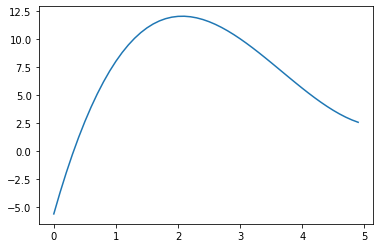

In [6]:
x = np.arange(0, 5, 0.1)
plt.figure()
plt.plot(x,p(x, coef))

## Noisy Data

Now that we have the original system setup, we will use the coeffecients you solved for above to generate noisy data.

The data generation has been provided below, but **you will need to fill in the `gen_mat` function below.**

Hint: this should be very similar to how you generated your `A` matrix above.

In [7]:
def gen_data(num_points, coef):
    np.random.seed(255)
    x = np.random.uniform(0, 5, num_points)
    y = p(x, coef) + np.random.normal(0, 2, num_points)
    return x,y

#TODO: Fill in this function
def gen_mat(x):
    '''
    Takes: x, a list of x values that we measured
    Returns: The new A matrix for our noisy system
    '''
#     print(type(x.size))
    mat = [[x[i]**3, x[i]**2, x[i], 1] for i in range(x.size)]
    A = np.array(mat)
    return A

In [8]:
num_points = 100
x_pts, y_pts = gen_data(num_points, coef) # These are the measurements you've gotten from the sensors
A = gen_mat(x_pts) # This creates the matrix for the new system we will solve for
assert A.shape == (num_points, 4)

Now that we have the system setup, we need to solve for the coeffecients. We will solve for the coeffecients in two different ways - using a numpy function and an explicit solution.

The first way will be using the in built `np.linalg.lstsq` function. **Fill in the code block below**

In [9]:
#TODO: Use the numpy function to solve for our coefficients
t0 = time.time()
# coef_lst_sq = np.dot(np.dot(A, np.linalg.inv(np.dot(np.transpose(A), A))),np.transpose(A))
coef_lst_sq = np.linalg.lstsq(A, y_pts)[0]
print("Time taken: {0:.5f} ms".format(time.time()-t0))
print(coef_lst_sq)

Time taken: 0.00289 ms
[ 0.59687635 -6.5145924  19.24898365 -5.18965517]


/home/computer/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


The plot below shows the data points we collected, the original polynomial in red, and our estimate of the polynomial using the noisy data in black.

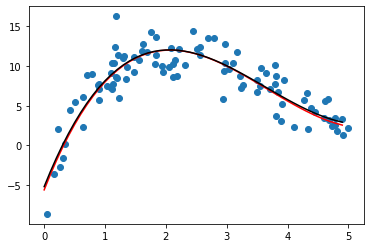

In [10]:
plt.figure()
plt.scatter(x_pts,y_pts)
ax = np.arange(0, 5, 0.1)
plt.plot(ax, p(ax, coef), color='r')
plt.plot(ax, p(ax, coef_lst_sq), color='black')

**Q: How do the coeffecients of this system differ from the original? If the there is no way to remove the noise in our system, how could we increase the accuracy of our system?**

The solution is close to the original. We could try to limit noise, take more measurements, and account for outliers.

<font color=blue> A:
</font>

Now we will solve the same system, but using the explicit closed form solution for least squares. **Fill in the code block below**

In [11]:
#TODO: Use the closed form solution to solve for our coeffecients
t0 = time.time()
coef_out = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(A), A)),np.transpose(A)),y_pts)
print("Time taken: {0:.5f} ms".format(time.time()-t0))
print(coef_out)

Time taken: 0.00069 ms
[ 0.59687635 -6.5145924  19.24898365 -5.18965517]


**Q: Compare the two different ways of solving. How do the coeffecients differ? How about the time to solve each system? And what do you think the reason for these similarities/differences is?**

The explicit solution took longer but appears to have yielded the same result. I think the diffence is in optimizing the matrix inversion of $A^TA$.

<font color=blue>A: 
</font>

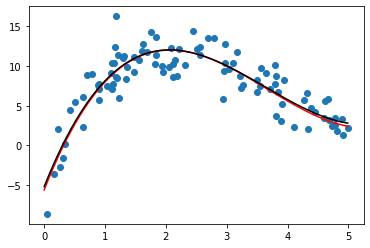

In [12]:
plt.figure()
plt.scatter(x_pts,y_pts)
ax = np.arange(0, 5, 0.01)
plt.plot(ax, p(ax, coef), color='r')
plt.plot(ax, p(ax, coef_out), color='black')